**CSOC ML - Assignment 4**

Welcome to CSOC ML (2019) - Assignment 4. In this assignment, you will make a model that recognises faces! We will also explore Dimensionality Reduction.

In this assignment, we will use NumPy, Matplotlib, sklearn, and OpenCV (an image processing library). Instead of OpenCV, one could instead use other image processing libraries like skimage Pillow, scipy.ndimage etc. But for the sake of uniformity, you have to complete this assignment using OpenCV.

# **IMPORTING LIBRARIES**

In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm
from sklearn import preprocessing
import os
import time
import matplotlib
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import normalize
from sklearn.svm import LinearSVC
import cv2
from google.colab import drive
from sklearn import datasets
from numpy.linalg import eig
import sklearn

#MOUNTING DRIVE

This will act like your local storage. Once you save the data in the drive you can access it just like you access the data in the local storage.

In [0]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [0]:
cd '/content/gdrive/My Drive/'

/content/gdrive/My Drive


#PCA

You have studied PCA(Principal Component Analysis) previous week. So this time you will implement 
your own PCA. That will give you more knowlegdge about how PCA works. Dimensionality Reduction plays an important role while dealing with large datasets so before moving to bigger stuff we are going to learn a little about PCA.

#LOADING THE DATASET

We will we working on the iris dataset to see how PCA actually works.

In [0]:
# We are importing iris dataset from the sklearn library
#This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray
#The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.
iris = datasets.load_iris()
X = iris.data #features
y = iris.target #types
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

#IMPLEMENTING PCA

**The real stuff....**

Now you are going to implement PCA. Just follow the steps in the comment section of the code. Read the code carefully. In case of any help you can refer to this link
[https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/](https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/)



In [0]:
#YOUR CODE STARTS HERE
# First you have to calculate the mean of each column
from numpy import mean
from numpy import cov
M = mean(X.T , axis =1)
print(M)
# Now centre columns by subtracting the means from the data

C = X - M

#Get the covariance matrix using numpy

V = cov(C.T)

#Now do eigendecomposition of covariance matrix. Don't worry there is also a library in numpy for that. Check numpy.linalg.eig
#Store the eigenvalues and eigenvectors in eig_val and eig_vec respectively

eig_val, eig_vec = eig(V)

l= []
m =[]
#Print your eigen vectors and eigen values
for i in range(len(eig_val)):
    eigvec = eig_vec[:,i].reshape(-1 , 1).T
    l.append(eigvec)
    m.append(eig_val[i])
    print('Eigenvector {}: \n{}'.format(i+1, eigvec))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val[i]))
d = np.array(l).reshape(4,4)
n = np.array(m).reshape(4,1)
print(d)
print(n)

[5.84333333 3.05733333 3.758      1.19933333]
Eigenvector 1: 
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]]
Eigenvalue 1 from covariance matrix: 4.228241706034867
Eigenvector 2: 
[[-0.65658877 -0.73016143  0.17337266  0.07548102]]
Eigenvalue 2 from covariance matrix: 0.24267074792863336
Eigenvector 3: 
[[-0.58202985  0.59791083  0.07623608  0.54583143]]
Eigenvalue 3 from covariance matrix: 0.07820950004291945
Eigenvector 4: 
[[ 0.31548719 -0.3197231  -0.47983899  0.75365743]]
Eigenvalue 4 from covariance matrix: 0.023835092973449823
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [-0.65658877 -0.73016143  0.17337266  0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]
 [ 0.31548719 -0.3197231  -0.47983899  0.75365743]]
[[4.22824171]
 [0.24267075]
 [0.0782095 ]
 [0.02383509]]


In [0]:
#YOUR CODE STARTS HERE

# Make the (eigenvalue, eigenvector) tuple
eig = np.concatenate(( n , d ), axis= 1)
print(eig)
eig_pairs = tuple(eig)
l =[]
print(eig_pairs)
# Sort the tuples (eig_pairs) from high to low
for i in range(len(eig_val)):
  max = eig[i]          
  for j in range(i , len(eig_val)):
    if(eig[j][0] > max[0]):
      max = eig[j]
  
  l.append(max)
print(l)    
    
print(l[0])   
               
               

#YOUR CODE ENDS HERE

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
# The values printed must be in decreasing order
#for i in eig_pairs:
 #   print(i[0])


[[ 4.22824171  0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.24267075 -0.65658877 -0.73016143  0.17337266  0.07548102]
 [ 0.0782095  -0.58202985  0.59791083  0.07623608  0.54583143]
 [ 0.02383509  0.31548719 -0.3197231  -0.47983899  0.75365743]]
(array([ 4.22824171,  0.36138659, -0.08452251,  0.85667061,  0.3582892 ]), array([ 0.24267075, -0.65658877, -0.73016143,  0.17337266,  0.07548102]), array([ 0.0782095 , -0.58202985,  0.59791083,  0.07623608,  0.54583143]), array([ 0.02383509,  0.31548719, -0.3197231 , -0.47983899,  0.75365743]))
[array([ 4.22824171,  0.36138659, -0.08452251,  0.85667061,  0.3582892 ]), array([ 0.24267075, -0.65658877, -0.73016143,  0.17337266,  0.07548102]), array([ 0.0782095 , -0.58202985,  0.59791083,  0.07623608,  0.54583143]), array([ 0.02383509,  0.31548719, -0.3197231 , -0.47983899,  0.75365743])]
[ 4.22824171  0.36138659 -0.08452251  0.85667061  0.3582892 ]


In [0]:
#Now the take the first k eigen_vectors. Here we have taken k as 2.
weights = np.hstack((d[0].reshape(4,1), d[1].reshape(4,1)))
print('Matrix of Weight :\n', weights)

#Now multiply the matrix X with the weights to get the reduced matrix and name the matrix as reduced_x
#YOUR CODE STARTS HERE

reduced_x = X.dot(weights)
print('Reduced matrix X :\n',reduced_x)
#YOUR CODE ENDS HERE

Matrix of Weight :
 [[ 0.36138659 -0.65658877]
 [-0.08452251 -0.73016143]
 [ 0.85667061  0.17337266]
 [ 0.3582892   0.07548102]]
Reduced matrix X :
 [[ 2.81823951 -5.64634982]
 [ 2.78822345 -5.14995135]
 [ 2.61337456 -5.18200315]
 [ 2.75702228 -5.0086536 ]
 [ 2.7736486  -5.65370709]
 [ 3.2215055  -6.06828303]
 [ 2.68182738 -5.23749119]
 [ 2.87622016 -5.49033754]
 [ 2.6159824  -4.74864082]
 [ 2.82960933 -5.21317833]
 [ 2.99541804 -5.97202148]
 [ 2.8896099  -5.34168252]
 [ 2.71625587 -5.09184058]
 [ 2.27856139 -4.81555799]
 [ 2.85761474 -6.50571721]
 [ 3.1163261  -6.66501491]
 [ 2.87883726 -6.13763209]
 [ 2.85406843 -5.63880172]
 [ 3.30254481 -6.19979162]
 [ 2.91437873 -5.84051289]
 [ 3.19210892 -5.71829851]
 [ 2.9586599  -5.75994864]
 [ 2.28642572 -5.46042065]
 [ 3.19963195 -5.42566143]
 [ 3.14661108 -5.28967072]
 [ 2.99569623 -5.1809357 ]
 [ 3.03354506 -5.45790407]
 [ 2.94004523 -5.69467143]
 [ 2.86283042 -5.63899256]
 [ 2.87037575 -5.12999135]
 [ 2.91496666 -5.12263409]
 [ 3.09243264 

#VISUALISING AND COMPARING

Now we will visualise and compare the performance of our pca with the inbuilt pca provided to us by sklearn library


Text(0.5, 1.0, 'PCA implemented by you')

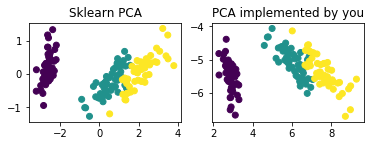

In [0]:
#Applying Sklearn PCA.
pca = PCA(n_components=2)
pca.fit(X)
x_pca=pca.transform(X)
#Visually comparing the plots after applying our own pca and sklearn pca function
plt.subplot(221)
plt.scatter(x_pca[:,0],x_pca[:,1],c=y)
plt.title('Sklearn PCA')
plt.subplot(222)
plt.scatter(reduced_x[:,0],reduced_x[:,1],c=y)
plt.title('PCA implemented by you')

We can see from the above figure that the main difference between the two graphs is that our graph is shifted and also our PCA is reflecting mirror image about horizontal axis but we can see the distance between any two points is same in our PCA as well as in PCA of sklearn i.e Information is preserved in both the graphs. We can also see this by comparing the performances of both

In [0]:
#Accuracies on both the reduced training sets

#Fitting the SVC model on sklearn PCA dataset
clf = svm.SVC(gamma='auto')
clf.fit(x_pca, y)
y_pred=clf.predict(x_pca)
print('Accuracy on the sklearn reduced dataset: ',sum(y==y_pred)/len(y_pred))

#Fitting the SVC model on our PCA dataset
clf1 = svm.SVC(gamma='auto')
clf1.fit(reduced_x,y)
y_pred=clf1.predict(reduced_x)
print('Accuracy on the our PCA reduced dataset: ',sum(y==y_pred)/len(y_pred))


Accuracy on the sklearn reduced dataset:  0.9533333333333334
Accuracy on the our PCA reduced dataset:  0.9533333333333334


We see that acuuracies are the same!! So the pca implemented by you is correct.

**CHEER UP!!!!!** 

You are halfway through the assignment.
Now comes the major part of assignment.Now we will make a face recogniser model.
But first there are some things you have to do :-


*   First you have to download the dataset provided in the link.

      LINK TO DATASET :  https://drive.google.com/drive/folders/1sXCH0jljR35xrL4c1d04A_Ra4V6Bvey6?usp=sharing
*   Second you have to upload the dataset on the drive which you have mounted (your google drive).

**Note**- Don't change the name of the folder i.e all the data must be stored in the data folder



#Loading data

**Task 1**

The first task is to load the images from data/folder as NumPy array. First manually go through the data, and understand how it is organised.

X should be a NumPy array containing images and y should contain the corresponding labels.

Go through os.path.join and os.listdir functions. Refer to cv2.imread function for loading image. Note the images are colored so you have to store them as black and white.

In [0]:
X = []
y = []
for sub_dir in os.listdir('data'):
    if not os.path.isdir(os.path.join('data', sub_dir)):
        continue

    label = int(sub_dir)
    for file in os.listdir(os.path.join('data', sub_dir)):
        #YOUR CODE STARTS HERE
        
        # get the full path of the image. (Hint: use os library as used above)
        filename = os.path.join('data', sub_dir)
        # Read the image using opencv
        image= cv2.imread(os.path.join(filename,file),cv2.IMREAD_GRAYSCALE)
    
        # Append the image and label in the X and y list respectively
        X.append(image)
        y.append(label)
        #YOUR CODE ENDS HERE
        
X = np.array(X, dtype='float64')
y = np.array(y)

print("X.shape: {}, y.shape: {}".format(X.shape, y.shape))

X.shape: (400, 200, 180), y.shape: (400,)


#Analysing data

Let us first visualise the first image of our dataset.

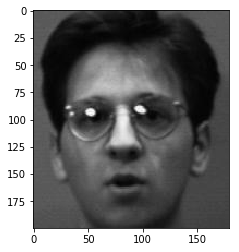

Number of Images:  400
Number of features for each image:  36000


In [0]:
imgplot = plt.imshow(X[1],cmap='gray')
plt.show()
print('Number of Images: ',X.shape[0])
print('Number of features for each image: ',X.shape[1]*X.shape[2])

#Feature Extraction
**Task 2**

Currently, X is a 3D NumPy array. For each of the 400 images, we have a corresponding 2D matrix storing the pixel values. We will flatten this 2D matrix and use the flattened vector as the feature vector for the image.

Note that the number of features obtained this way are very large. There are a number of better methods to extract features from images like convolutional neural networks but for now lets go with this.

Reshape X into 400xN, where N is the number of features (200x180).

In [0]:
#YOUR CODE STARTS HERE
X = X.reshape(400 , 36000)
#YOUR CODE ENDS HERE

#Dimensionality Reduction

First, we will use Dimensionality Reduction for Data Visualisation. We will reduce the dimensionality of the data to 2 and plot it. Before applying PCA (one of the Dimensionality Reduction algorithms), we will standardise the data. For sake of clarity, we will be only using the data corresponding to the first num_labels classes. Later you can experiment by changing this parameter.

In [0]:
num_labels = 5
X_sample = X[y <= num_labels]
y_sample = y[y <= num_labels]

X_sample_scaled = normalize(X_sample, norm='l2', axis=0, copy=True, return_norm=False)
print(X_sample_scaled.shape)

(100, 36000)


**Task 3**

Reduce the dimensionality of X_sample_scaled to 2 using sklearn.decomposition.PCA and assign it to X_sample_2d

In [0]:
# YOUR CODE STARTS HERE
pca =PCA(n_components = 2)
pca.fit(X_sample_scaled)
X_sample_2d = pca.transform(X_sample_scaled)

# YOUR CODE ENDS 

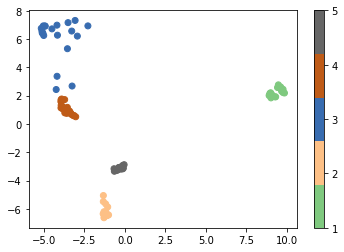

In [0]:
#Visualising the data
num_labels=5
plt.scatter(X_sample_2d[:,0],X_sample_2d[:,1],c=y_sample,cmap=plt.cm.get_cmap('Accent', num_labels))

color = plt.colorbar()
loc = np.arange(1, num_labels+1)
color=color.set_ticks(loc)


We can clearly see PCA has projected the highly dimensional dataset into 2 dimensions, which we can see on plotting look clustered.

Although this data visualisation is not very useful for supervised learning tasks, they prove useful for unsupervised learning tasks.

#Speeding up training and reducing memory
The other two applications of Dimensionality reduction are, speeding up training and reducing memory required to store the data. We will start by investigating the memory required.

In [0]:
print("Memory used by X_train: {:.2f}MB".format(X.nbytes / 1024 / 1024))

Memory used by X_train: 109.86MB


In this case, because of low resolution of images and less data, the memory used in storing data is already quite low.

#Splitting the dataset

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=34)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=34)

#Standardising the Dataset
Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data.

Standardising the dataset is not only helpful for training machine learning models but is also a requirement before applying PCA. We will standardise all three X_train, X_val and X_test.

In [0]:
# Standardize the data (Hint: See above)
# YOUR CODE STARTS HERE
from sklearn.preprocessing import StandardScaler
X_train_scaled = []
X_val_scaled =[]
scaler = StandardScaler()
scaler = scaler.fit(X_train)
normalized = scaler.transform(X_train)
for i in range(280):
  X_train_scaled.append(normalized[i])
X_train_scaled = np.array(X_train_scaled)
print('X_train_scaled: \n' , X_train_scaled)  
#X_train_scaled = 
#X_val_scaled = 
scaler_val = StandardScaler()
scaler_val = scaler_val.fit(X_val)
normalized_val = scaler_val.transform(X_val)
for i in range(60):
  X_val_scaled.append(normalized_val[i])
X_val_scaled = np.array(X_val_scaled)
print('X_val_scaled : \n',X_val_scaled)
# YOUR CODE ENDS HERE
print(X_val_scaled.shape)

X_train_scaled: 
 [[ 1.2847427   1.30904276  1.36291185 ...  0.94863783  0.87569868
   0.84622936]
 [-0.43341496 -0.44080121 -0.4448348  ... -0.88246285 -0.89937654
  -0.90734802]
 [ 1.04359776  1.00734552  1.00136252 ... -1.03505457 -1.07046812
  -1.07636753]
 ...
 [-1.94057079 -1.91911767 -1.92116124 ...  2.36556098  2.35136362
   2.3040226 ]
 [-1.63913962 -1.64759015 -1.64999924 ... -0.90426167 -0.92076298
  -0.92847546]
 [ 0.19959049  0.25310243  0.27826386 ... -0.55548059 -0.72828495
  -0.71720108]]
X_val_scaled : 
 [[ 0.18418069  0.14281704  0.07093764 ... -0.06260132 -0.33427773
  -0.59265274]
 [-0.33221377 -0.33704822 -0.30361312 ... -0.59918411 -0.71034017
  -0.67627218]
 [ 0.18418069  0.17709313  0.13903778 ... -0.8468377  -0.85658667
  -0.90622562]
 ...
 [-0.09122969  0.00571268  0.17308785 ... -0.68173531 -0.68944781
  -0.69717704]
 [-0.64205045 -0.64553303 -0.64411381 ... -0.8261999  -0.81480196
  -0.80170133]
 [ 1.69893779  1.78806938  1.87559132 ...  0.47398146  0.480524

#Training and Hyperparameter Tuning
**Without Dimensionality reduction**

We will be using time magic command in Jupyter Notebook to measure the time taken in fitting the model. Read up about other useful magic commands like timeit prun, lprun on the web page linked before.

In [0]:
#clf = LinearSVC(C=.001)
#%time clf = clf.fit(X_train_scaled, y_train)

#print("Training accuracy: {:.4f}, Val Accuracy: {:.4f}".format(clf.score(X_train_scaled, y_train), clf.score(X_val_scaled, y_val)))

In [0]:
clf = LogisticRegression(C=.001)
%time clf = clf.fit(X_train_scaled, y_train)

print("Training accuracy: {:.4f}, Val Accuracy: {:.4f}".format(clf.score(X_train_scaled, y_train), clf.score(X_val_scaled, y_val)))

**With Dimensionality reduction**

Clearly, the time taken to train the model is considerably high. It is infeasible to perform hyperparameter tuning when training the model takes so much time. In some cases when the dataset is even bigger, we might not be able to even train the model with the computing resources in hand. PCA becomes essential to speed up training.

#Task 4

Make an object of PCA class named pca so that 99% of variance is preserved. Refer to the documentation of PCA class.



In [0]:
# YOUR CODE STARTS HERE
#from matplotlib.mlab import PCA as mlabPCA

#mlab_pca = mlabPCA(X_sample.T)

from sklearn.decomposition import PCA
pca = PCA(n_components = .99)
    
# YOUR CODE ENDS HERE

In [0]:

X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)

print("Dimensionality reduced to:", pca.n_components_)

clf = LogisticRegression(C=10000,multi_class='auto')
%time clf = clf.fit(X_train_pca, y_train)

print("Training accuracy: {:.4f}, Val Accuracy: {:.4f}".format(clf.score(X_train_pca, y_train), clf.score(X_val_pca, y_val)))

clf = LinearSVC(C=.001)
%time clf = clf.fit(X_train_pca, y_train)

print("Training accuracy: {:.4f}, Val Accuracy: {:.4f}".format(clf.score(X_train_pca, y_train), clf.score(X_val_pca, y_val)))


Dimensionality reduced to: 107


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


CPU times: user 1.03 s, sys: 86 ms, total: 1.11 s
Wall time: 1 s
Training accuracy: 1.0000, Val Accuracy: 1.0000
CPU times: user 1.94 s, sys: 86.6 ms, total: 2.03 s
Wall time: 1.91 s
Training accuracy: 1.0000, Val Accuracy: 1.0000


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Clealy you can see that the training time is reduced as compared to that without pca. Although PCA is faster at the cost of accuracy the models can be fine tuned easily and more experiments can be performed. This is a huge benifit of PCA.

#APPLY ANOTHER ALGORITHM

Play with the dataset. Try to apply algorithm like SVC, decision trees etc. and check whether you are getting higher accuracies using these algorithm.

In [0]:
#YOUR CODE STARTS HERE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC



clf = DecisionTreeClassifier()
%time clf = clf.fit(X_train_pca, y_train)

print("Training accuracy: {:.4f}, Val Accuracy: {:.4f}".format(clf.score(X_train_pca, y_train), clf.score(X_val_pca, y_val)))


clf = KNeighborsClassifier(n_neighbors = 13 )
%time clf = clf.fit(X_train_pca, y_train)

print("Training accuracy: {:.4f}, Val Accuracy: {:.4f}".format(clf.score(X_train_pca, y_train), clf.score(X_val_pca, y_val)))

clf = RandomForestClassifier(n_estimators = 13)
%time clf = clf.fit(X_train_pca, y_train)

print("Training accuracy: {:.4f}, Val Accuracy: {:.4f}".format(clf.score(X_train_pca, y_train), clf.score(X_val_pca, y_val)))


clf_1 = GaussianNB()
%time clf_1 = clf_1.fit(X_train_pca, y_train)

print("Training accuracy: {:.4f}, Val Accuracy: {:.4f}".format(clf_1.score(X_train_pca, y_train), clf_1.score(X_val_pca, y_val)))


#%time clf = clf.fit(X_train_pca, y_train)

#print("Training accuracy: {:.4f}, Val Accuracy: {:.4f}".format(clf.score(X_train_pca, y_train), clf.score(X_val_pca, y_val)))

#YOUR CODE ENDS HERE

CPU times: user 10.2 ms, sys: 0 ns, total: 10.2 ms
Wall time: 10.2 ms
Training accuracy: 1.0000, Val Accuracy: 0.6667
CPU times: user 1.1 ms, sys: 44 µs, total: 1.14 ms
Wall time: 2.67 ms
Training accuracy: 1.0000, Val Accuracy: 1.0000
CPU times: user 20.3 ms, sys: 40 µs, total: 20.3 ms
Wall time: 20.2 ms
Training accuracy: 1.0000, Val Accuracy: 1.0000
CPU times: user 1.76 ms, sys: 0 ns, total: 1.76 ms
Wall time: 1.68 ms
Training accuracy: 1.0000, Val Accuracy: 0.8000


#Testing
We now test our model on the testing data.

In [0]:
def plot_gallery(images, titles, rows=3, cols=4):
    plt.figure()
    for i in range(rows * cols):
        fig = plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())
    plt.tight_layout()
    plt.show()
        
def titles(y_pred, y_test):
    for i in range(y_pred.shape[0]):
        yield 'predicted: {0}\ntrue: {1}'.format(y_pred[i], y_test[i])




In [0]:


clf = LogisticRegression().fit(X_train_pca , y_train)
X_test_scaled = normalize(X_test, norm='l2', axis=0, copy=True, return_norm=False)
X_test_pca = pca.transform(X_test_scaled)

y_pred = clf.predict(X_test_pca)
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, y_pred)))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy score: 1.0000


#PREDICTIONS

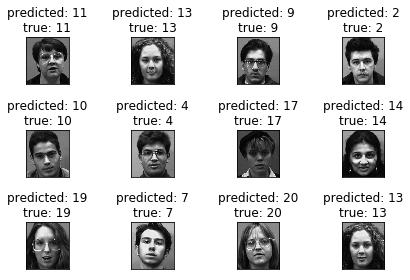

In [0]:
prediction_titles = list(titles(y_pred, y_test))
plot_gallery(X_test.reshape(-1, 200, 180), prediction_titles)

Congratulations you have built a face recogniser! You also explored the application of dimensionality reduction in this assignment.

If you have sincerely completed the material and the assignments of last two sections, you have gained sufficient knowledge to solve real life supervised Machine Learning problems. You can now go explore the world of competitive machine learning on Kaggle.com.